# Spatio-Temporal Data | Types

# 0 Imports

The following packages will be needed for this notebook.

In [1]:
# Imports for the whole notebook:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import json
import contextily as ctx
import mplleaflet
#%matplotlib notebook
from matplotlib import pyplot as plt
from IPython.display import display
from h3 import h3
from shapely.ops import cascaded_union
from shapely.geometry import mapping
from IPython.display import YouTubeVideo, Image
from shapely_geojson import dumps
from shapely import geometry
import warnings
warnings.filterwarnings('ignore')
# Fix for ssl certificate
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
%%html
<style>
table {float:left}
</style>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-cly1{text-align:left;vertical-align:middle}
.tg .tg-7fle{font-weight:bold;background-color:#efefef;text-align:center;vertical-align:top}
.tg .tg-ncfi{font-weight:bold;background-color:#efefef;text-align:center;vertical-align:middle}
.tg .tg-cyhs{font-weight:bold;background-color:#efefef;text-align:left;vertical-align:middle}
.tg .tg-hpm8{font-weight:bold;background-color:#f8a102;border-color:#333333;text-align:center;vertical-align:middle}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>

# 1 Introduction

In this notebook we will take a closer look on how to distinguish different categories of spatio-temporal data and how to anlayse, discretize and visualize them.

This notebook makes use of `pandas` and `geopandas` - libraries you already know. As a reminder, the official documentation can be found here: 
* https://pandas.pydata.org/docs/
* https://geopandas.org/index.html

# 2 Types of data

In data analysis, there is a multitude of possible input data that could be classified from various perspectives. For the purpose of this lab course, it makes sense to consider the possible input data from the point of view of their spatial and temporal properties.
The following figure shows possibile types and properties of input data in a mobility data analysis. They are divided into different spatio-temporal categories.

<table class="tg">
  <tr>
    <th class="tg-hpm8" colspan="5">Common datasets in mobility data analysis</th>
  </tr>
  <tr>
    <td class="tg-cyhs">Class</td>
    <td class="tg-ncfi">None</td>
    <td class="tg-7fle">Spatial</td>
    <td class="tg-7fle">Temporal</td>
    <td class="tg-7fle">Spatio-temporal</td>
  </tr>
  <tr>
    <td class="tg-cyhs">Data types</td>
    <td class="tg-0lax">- Numbers<br>- Characters<br>- Strings</td>
    <td class="tg-0lax">- Points<br>- Lines<br>- Surfaces<br>- Volumes</td>
    <td class="tg-0lax">- Timestamps<br>- Timeseries</td>
    <td class="tg-0lax">- Timestamps<br>- Timeseries<br>- Points<br>- Lines<br>- Surfaces</td>
  </tr>
  <tr>
    <td class="tg-cyhs">Variables</td>
    <td class="tg-cly1" colspan="4">univariate/multivariate</td>
  </tr>
</table>

## Univariate data without spatial or temporal context
A data series is described as univariate if it consists of only one variable.

In [3]:
# Read grades dataset from csv:
df_grades = pd.read_csv('data/grades.csv')
df_grades.head()

Grades
0     1.0
1     4.3
2     2.7
3     1.3
4     1.7

## Multivariate data without spatial or temporal conext
A data series is described as multivariate if it consists of more than one variable.

In [4]:
# Read sport event dataset from csv:
df_sport_event = pd.read_csv('data/sport_event.csv')
df_sport_event.head()

Name  year of birth  long jump in m  running 60 m in s
0    Kevin           1995            7.17               7.23
1     Niki           1996            6.92               7.49
2  Alireza           1993            6.40               7.72
3  Patrick           1992            7.50               8.12
4     Jörg           1957            5.80               9.27

## Temporal Data
Temporal data assign a time stamp to the respective observations. It is therefore not explicitly evident from the data where an observation took place but only when.

speed  engine temperature
timestamp                                     
2019-07-26 00:00:00     99                89.8
2019-07-26 00:01:00    100                89.4
2019-07-26 00:02:00    103                91.3
2019-07-26 00:03:00    101                89.1
2019-07-26 00:04:00    104                90.1

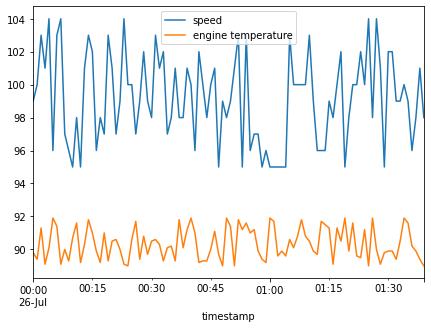

In [5]:
# Read car measurement dataset from csv:
df_car = pd.read_csv('data/car.csv',index_col=0,parse_dates=True)

# Plot the daset to get more insights:
fig, ax = plt.subplots(1, figsize= (7,5))
df_car.plot(ax = ax)
display(df_car.head())
plt.show()

## Spatial Data
First Law of Geography: 
>Everything is related to everything else, but near things are more related than distant things

In contrast to data without spatio-temporal reference, spatial data always contain at least one spatial or geographical information. Spatial data therefore either describe only locations that can be given as points, polygons or lines, or they contain observations of other sizes in addition to spatial information. Spatial information can occur as points, lines or polygons. The values of the other observation variables are then regarded as associated with the given location.

Lets have a look on a spatial dataset. For this example we look at a dataset, which contains intormation abtout public WIFI-Hotspots in Munich. This dataset was derived from https://www.opengov-muenchen.de/. Check this site out for more usefull open data sets of Munich.

In [6]:
# Public Hotspots in Munich from opengov-muenchen.de
URL = 'https://www.opengov-muenchen.de/dataset/2f256473-423d-4c3d-846c-09977aa31205/resource/4ac5b616-ebbf-4857-ae79-43369d6c4c87/download/m-wlan2015-01-21.csv'

# Download dataset and read into DataFrame
df_munich_hotspots = pd.read_csv(URL)

# Convert latitude and longitude values to floats
df_munich_hotspots.latitude = df_munich_hotspots.latitude.astype(float)
df_munich_hotspots.longitude = df_munich_hotspots.longitude.astype(float)

# Look at the data
df_munich_hotspots.head()

Platz Acess Point   latitude  longitude
0     Odeonsplatz      AP_1    48.142361  11.577892
1     Odeonsplatz      AP_2    48.142429  11.577247
2     Odeonsplatz      AP_4    48.142609  11.578021
3  Sendlinger Tor      AP_1    48.133764  11.566767
4  Sendlinger Tor      AP_2    48.133906  11.567297

Spatial data becomes most useful for futher analysis, if we convert it into spatial datatypes. `GeoPandas` offers a variety of functions for spatial data analysis. Let's load our data set into a `GeoDataFrame`

In [7]:
# Convert it into a GeoDataframe
geo_df = gpd.GeoDataFrame(df_munich_hotspots.iloc[:,0:2], crs='epsg:4326', 
                          geometry=gpd.points_from_xy(df_munich_hotspots.longitude, df_munich_hotspots.latitude))
geo_df.head()

Platz Acess Point                   geometry
0     Odeonsplatz      AP_1    POINT (11.57789 48.14236)
1     Odeonsplatz      AP_2    POINT (11.57725 48.14243)
2     Odeonsplatz      AP_4    POINT (11.57802 48.14261)
3  Sendlinger Tor      AP_1    POINT (11.56677 48.13376)
4  Sendlinger Tor      AP_2    POINT (11.56730 48.13391)

In order to get a better understanding of our dataset, let's use a simple plot to see how our datapoints are spatially distributed. 

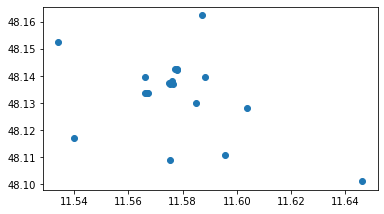

In [8]:
# Quickly plot the data
geo_df.plot()
plt.show()

## Vizualise Spatial Data
Plotting our data on a map gives us a more meaningful illustration. 

### contextily

You already learned `mplleaflet`, an other possible approach is to use `contextily` to render maptiles in a matplotlib plot.
For more Information look at:  
https://github.com/geopandas/contextily
http://geopandas.org/gallery/plotting_basemap_background.html#sphx-glr-gallery-plotting-basemap-background-py

Web map tiles are typically provided in Web Mercator projection (e.g.,`epsg=3857`), so we need to make sure to convert our data to the desired CRS to combine our data and background tiles in the same plot:

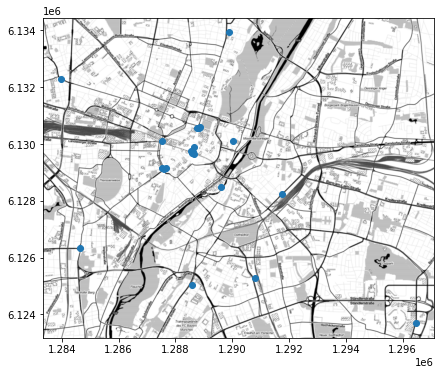

In [9]:
#Plot data on map with contextily
fig, ax1 = plt.subplots(1, figsize = (7,10))
geo_df.to_crs(epsg=3857).plot(ax = ax1)
ctx.add_basemap(ax1, url=ctx.sources.ST_TONER)
plt.show()

### mplleaflet
As second approach is `mplleaflet`. We know `mplleaflet` from former lessons, lets recapitlate how to use it.
Remark: mplleaflet uses `WGS84`, so we need to set `crs` to `epsg=4326`

In [21]:
# Plot data on map with mplleaflet
fig, ax1 = plt.subplots(1)
fig.set_size_inches(5, 8)
geo_df.to_crs(epsg = 4326).plot(ax = ax1)
mplleaflet.display(fig = fig)

### Which one to use?

Short answer: **It depends...**

* `mplleaflet` with it's interactive maps has advantages for exploative analysis, or interactive demonstrations
* `contextily` with it's static maps is more usefull when you need images for documents (thesis, paper, reports)

## Spatio-temporal Data

>Everything is related to everything else, but near and recent things are more related than distant things.

Spatio-temporal data represent a combination of both, spatial and temporal features. For example, it is possible that only the locations and times of occurrence are recorded for a given situation (e.g. place and time at which an emergency call was made), but it is also possible that further variables are given for an observation (e.g. place and time at which an emergency call was made and the reported number of injured).

This category of data has the highest practical and theoretical complexity and it is necessary to decide which local and temporal resolutions are necessary to accurately resolve the issue in each individual case. At the same time, these types of data also offer many potentials, since a large number of real processes - especially in mobility analysis - are dependent on place and time (e.g. it can be assumed that a larger number of people are present in industrial estates during typical working hours than outside this time at the same place).

Let's have a look at another dataset. In this case a dataset from a Munich carsharing company. 

In [11]:
# Read carshating dataset
df_fleet = pd.read_csv('data/carsharing.csv', parse_dates=['StartTime', 'DestinationTime'])
df_fleet.head()

License  StartLatitude  StartLongitude           StartTime  \
0        1      48.120915       11.554322 2019-07-01 00:03:04   
1        2      48.155135       11.533525 2019-07-01 00:03:04   
2        3      48.166351       11.562461 2019-07-01 00:03:04   
3        4      48.126794       11.570035 2019-07-01 00:13:04   
4        5      48.139170       11.556336 2019-07-01 00:03:04   

   DestinationLatitude  DestinationLongitude     DestinationTime  
0            48.100451             11.545499 2019-07-01 00:08:04  
1            48.163576             11.515973 2019-07-01 00:13:04  
2            48.151304             11.598850 2019-07-01 00:23:04  
3            48.142813             11.573468 2019-07-01 00:28:04  
4            48.114301             11.551703 2019-07-01 00:28:04

Hint from http://geopandas.org/gallery/create_geopandas_from_pandas.html?highlight=points_from

>A GeoDataFrame needs a shapely object. We use geopandas `points_from_xy()` to transform Longitude and Latitude into a list of `shapely.Point` objects and set it as a geometry while creating the `GeoDataFrame`.

In [12]:
# Load Pickups into GeoDataFrame
gdf_pickups = gpd.GeoDataFrame(crs='epsg:4326', geometry=gpd.points_from_xy(df_fleet.StartLongitude, df_fleet.StartLatitude))
gdf_pickups.index = df_fleet.StartTime
gdf_pickups.head()

geometry
StartTime                                     
2019-07-01 00:03:04  POINT (11.55432 48.12092)
2019-07-01 00:03:04  POINT (11.53352 48.15513)
2019-07-01 00:03:04  POINT (11.56246 48.16635)
2019-07-01 00:13:04  POINT (11.57004 48.12679)
2019-07-01 00:03:04  POINT (11.55634 48.13917)

We can use slicing to subselect separate time frames for our analysis. Let's compare the spatial distribution of carsharing rentals at noon with the demand at midnight. Can you discover any differences?

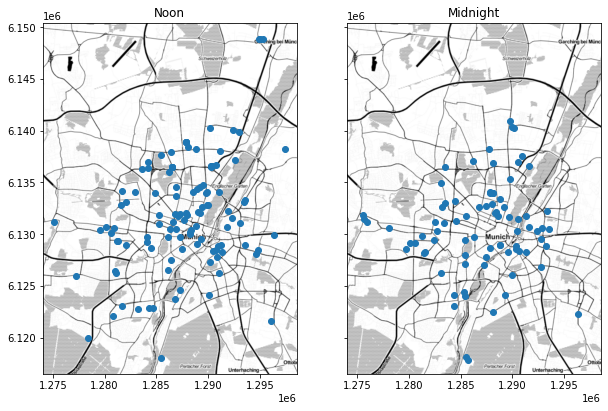

In [25]:
# Compare pickups around noon with pickups aroud midnight on map
fig = plt.figure()
fig.set_size_inches(10,8)

# Plot pickups between 11:30 and 12:30 on 2019-07-03
ax1 = plt.subplot(121)
ax1.set_title('Noon')
gdf_pickups['2019-07-02 11:30:00':'2019-07-02 12:30:00'].to_crs(epsg=3857).plot(ax = ax1)
ctx.add_basemap(ax1, url=ctx.sources.ST_TONER)

# Plot pickups between 23:30 and 00:30 2019-07-03
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
ax2.set_title('Midnight')
gdf_pickups['2019-07-02 23:30:00':'2019-07-03 00:30:00'].to_crs(epsg=3857).plot(ax = ax2)
ctx.add_basemap(ax2, url=ctx.sources.ST_TONER)

plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()


# 3. Excercise: Categories of Data

## Task Introduction
In this first excercice we will have a look on two publicly available dataset. What kind of data did you get? To which category do the datasets belong? Remember the categories:

<table class="tg">
  <tr>
    <th class="tg-hpm8" colspan="5">Common datasets in mobility data analysis</th>
  </tr>
  <tr>
    <td class="tg-cyhs">Class</td>
    <td class="tg-ncfi">None</td>
    <td class="tg-7fle">Spatial</td>
    <td class="tg-7fle">Temporal</td>
    <td class="tg-7fle">Spatio-temporal</td>
  </tr>
  <tr>
    <td class="tg-cyhs">Data types</td>
    <td class="tg-0lax">- Numbers<br>- Characters<br>- Strings</td>
    <td class="tg-0lax">- Points<br>- Lines<br>- Surfaces<br>- Volumes</td>
    <td class="tg-0lax">- Timestamps<br>- Timeseries</td>
    <td class="tg-0lax">- Timestamps<br>- Timeseries<br>- Points<br>- Lines<br>- Surfaces</td>
  </tr>
  <tr>
    <td class="tg-cyhs">Variables</td>
    <td class="tg-cly1" colspan="4">univariate/multivariate</td>
  </tr>
</table>

## 3.1 Excercise: Food Places
## Your Task
The first dataset to analyse is a dataset that contains all the places in Munich where you can buy food. The dataset can be found following this link: http://overpass-turbo.eu/s/OFf, but we already provided you a downloaded dataset as .geojson data. Ask yourself the question where many food places might be located?

1. Load the .geojson dataset into a `GeoDataFrame`
2. Plot the dataset on a map with `mplleaflet`
3. Decide to which category the dataset belongs.

Hint: Use methods like `DataFrame.describe()`, `DataFrame.head()` and `DataFrame.plot()` to get an insight into the datasets.

In [31]:
# This is the source of the food places dataset
file_food_places = "data/food_places_munich.geojson"

# Load the file into a GeoDataFrame and view the head of the dataset. Remember to set the correct coordinate system (crs='epsg:4326') when reading the dataset.
gdf_food_places = None # Load the file here
# INSERT CODE HERE | BEGIN
#<<solution>>
gdf_food_places = gpd.read_file(file_food_places, crs='epsg:4326')
display(gdf_food_places.head())
#<</solution>>
# INSERT CODE HERE | END

# Plot all foodplaces in Munich on a map. Hint: Use the GeoDataFrame.to_crs() function to set the correct coordinate syste before plotting and use
# the given ctx.add_basemap() function to add a basemap.
# INSERT CODE HERE | BEGIN
#<<solution>>
fig, ax1 = plt.subplots(1)
gdf_food_places.to_crs(epsg=3857).plot(ax=ax1, marker='o', markersize = 100)
#plt.tight_layout()
#ctx.add_basemap(ax1, url=ctx.sources.ST_TONER)
mplleaflet.display(fig=fig)
#fig.set_size_inches(7,7)
#<</solution>>
# INSERT CODE HERE | END

id            @id addr:city addr:country addr:housenumber  \
0    node/661339    node/661339   München           DE                7   
1  node/34034075  node/34034075   München           DE                6   
2  node/34072038  node/34072038   München           DE               45   
3  node/59933810  node/59933810      None         None             None   
4  node/59933811  node/59933811      None         None             None   

  addr:postcode        addr:street     amenity                       name  \
0         81377       Lorettoplatz        cafe                 Café Hölzl   
1         81825  Gartenstadtstraße  restaurant         Zum Goldenen Stern   
2         81827  Friedenspromenade  restaurant        Franziskaner Garten   
3          None               None  restaurant                    Goloseo   
4          None               None  restaurant  Bistro Trattoria La Giara   

                          opening_hours  ... capacity:biergarten capacity:pub  \
0  Mo-Fr 10:00-17:30; Sa-Su 11:00-17:30  ...                None         None   
1                                  None  ...                None         None   
2                     Mo-Su 10:00-24:00  ...                None         None   
3                                  None  ...                None         None   
4                                  None  ...                None         None   

  snack image payment:cards payment:contactless source:url private clothes  \
0  None  None          None                None       None    None    None   
1  None  None          None                None       None    None    None   
2  None  None          None                None       None    None    None   
3  None  None          None                None       None    None    None   
4  None  None          None                None       None    None    None   

                    geometry  
0  POINT (11.48825 48.10394)  
1  POINT (11.67022 48.11695)  
2  POINT (11.67072 48.10932)  
3  POINT (11.58497 48.18999)  
4  POINT (11.58132 48.18916)  

[5 rows x 286 columns]

In [ ]:
# Which category does this dataset belong to?
print("This is a ??? dataset")
# INSERT CODE HERE | BEGIN
#<<solution>>
print("This is a: multivariate spatial dataset")
#<</solution>>
# INSERT CODE HERE | END

## 3.2 Excercise: Car Owners in Munich
The second dataset to analyse is a dataset that contains information about the number of cars registered in Munich. Follow this link for more information https://www.opengov-muenchen.de/pages/indikatorenatlas. Where do you expect to live many car owners?

1. Use the given url to load the dataset into a `DataFrame`.
2. Have a look at the information contained in the dataset.
3. Decide to which category the dataset belongs.
4. Calculate the growth of registered cars in the district of Maxvorstadt, Munich from 2010 to 2017.

In [ ]:
# This is the source of your second dataset
url = "https://www.opengov-muenchen.de/dataset/1b758800-dc58-4da3-94ef-ae6c819759f7/resource/27e387c8-63e9-4b62-bdc8-704cb71ca64d/download/indikatorenatlas1812verkehrpersonenwagendichte.csv"

# Load the dataset into a DataFrame and have a look at the data:
# INSERT CODE HERE | BEGIN
#<<solution>>
df_carowners = pd.read_csv(url)
display(df_carowners.head(), df_carowners.describe())
#<</solution>>
# INSERT CODE HERE | END

# Which category does this dataset belongs to?
print('This is a ??? dataset')
# INSERT CODE HERE | BEGIN
#<<solution>>
print('This is a: multivariate saptio-temporal dataset')
#<</solution>>
# INSERT CODE HERE | END

In [ ]:
# We want further identify what information is available in the dataset. Try to identify all unique entries
# of the 'Year' column. Hint: There is a usefull function DataFrame.unique() available
# INSERT CODE HERE | BEGIN
#<<solution>>
df_carowners_years = df_carowners['Jahr'].unique()
print("These are the unique year entries: ", *df_carowners_years, "\n") 
#<</solution>>
# INSERT CODE HERE | END

# From which year are the oldest and newest entries?
# INSERT CODE HERE | BEGIN
#<<solution>>
print("The year of the newest record is: %d" %df_carowners_years.max()) 
print("The year of the oldest record is: %d\n" %df_carowners_years.min()) 
#<</solution>>
# INSERT CODE HERE | END

In the next step, we want to have a look on the development of registered vehicles in the  district of `03 Maxvorstadt`.

In [ ]:

# Calculate the number of registered cars ('Basiswert 1') that are privatly owned (['Ausprägung']=='privat') in the district
# of Maxvorstadt(['Räumliche Gliederung'] == '03 Maxvorstadt'). 
# Hint: You can combine locigal indexing arguments as following a[(a['b'] == 1) & (a['c'] == 2)]
df_carowners_privat_Maxvorstadt = None
# INSERT CODE HERE | BEGIN
#<<solution>>
df_carowners_privat_Maxvorstadt = df_carowners[(df_carowners['Ausprägung'] == 'privat') & (df_carowners['Räumliche Gliederung'] == '03 Maxvorstadt')]
#<</solution>>
# INSERT CODE HERE | END

# Calculate the growth of registered cars that are privatly owned in the Maxvorstadt district from 2010 to 2017 (e.g., ['Jahr'] == 2017).
# Hint: You can use df.values to get the value of entries.
df_carowners_privat_Maxvorstadt_growth_2017 = None
df_carowners_privat_Maxvorstadt_growth_2010 = None
# INSERT CODE HERE | BEGIN
#<<solution>>
df_carowners_privat_Maxvorstadt_growth_2017 = df_carowners_privat_Maxvorstadt[df_carowners_privat_Maxvorstadt['Jahr'] == 2017]['Basiswert 1'].values
df_carowners_privat_Maxvorstadt_growth_2010 = df_carowners_privat_Maxvorstadt[df_carowners_privat_Maxvorstadt['Jahr'] == 2010]['Basiswert 1'].values
#<</solution>>
# INSERT CODE HERE | END

# Print the growth of registered cars.
print("The growth of registered cars in the district of Maxvorstadt is: %0.2f%%\n" \
      %(df_carowners_privat_Maxvorstadt_growth_2017 / df_carowners_privat_Maxvorstadt_growth_2010 * 100 - 100)) 

In [ ]:
# Finally, plot the yearly numbers of registered cars ('Basiswert 1')
# INSERT CODE HERE | BEGIN
#<<solution>>
fig, ax1 = plt.subplots(1)
ax1.plot(df_carowners_years, df_carowners_privat_Maxvorstadt['Basiswert 1'].values)
ax1.set_ylabel('Number of registered cars')
ax1.set_xlabel('Year')
fig.show()
#<</solution>>
# INSERT CODE HERE | END